In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from utide import solve

In [41]:
from analysis_routines import *
from plotting_routines_xr import *
from harmonic_analysis import *
from wavelet_analysis import *
from processing_routines import datenum_to_epoch
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [4]:
chain_fit = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')

In [5]:
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G05 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta05 = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)

In [50]:
date_1 = datetime(2018, 11, 17)
date_2 = datetime(2018, 11, 18, 2)
period = [date_1, date_2]
data.depth.sel(depth=150, method='ffill').data

array(126, dtype=int32)

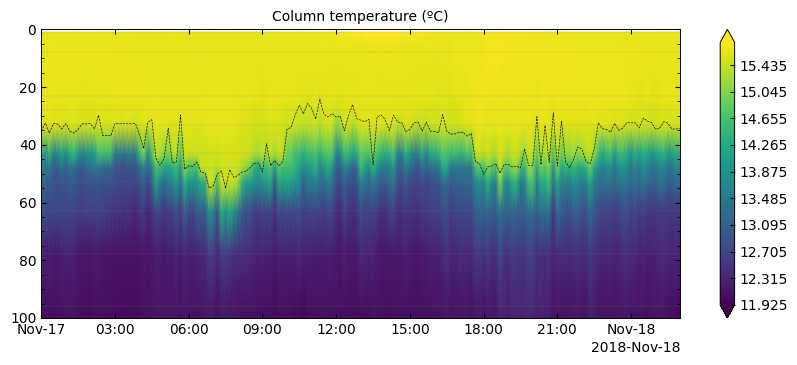

In [51]:
plot_column_temperature(data, chain_fit, period=period, ylims=[100, 0])

In [46]:
data_period = data.sel(date=slice(*period))


In [56]:
data_period

<xarray.Dataset>
Dimensions:          (lat: 1, lon: 1, date: 17281, depth: 16)
Coordinates:
  * lat              (lat) float32 43.79
  * lon              (lon) float32 3.782
  * date             (date) datetime64[ns] 2018-11-17 ... 2018-11-18
  * depth            (depth) int32 1 8 23 28 33 43 48 ... 96 108 126 151 176 201
Data variables:
    temp             (date, depth) float64 15.64 15.65 15.64 ... 11.8 11.76
    meassured_depth  (date, depth) float32 ...
Attributes:
    description:          Time series of AGL buy thermistor chain from 2018-1...
    time_coverage_start:  2018-11-16T11:00:00Z
    time_coverage_end:    2019-04-08T13:00:00Z
    title:                AGL_1 thermistor chain series

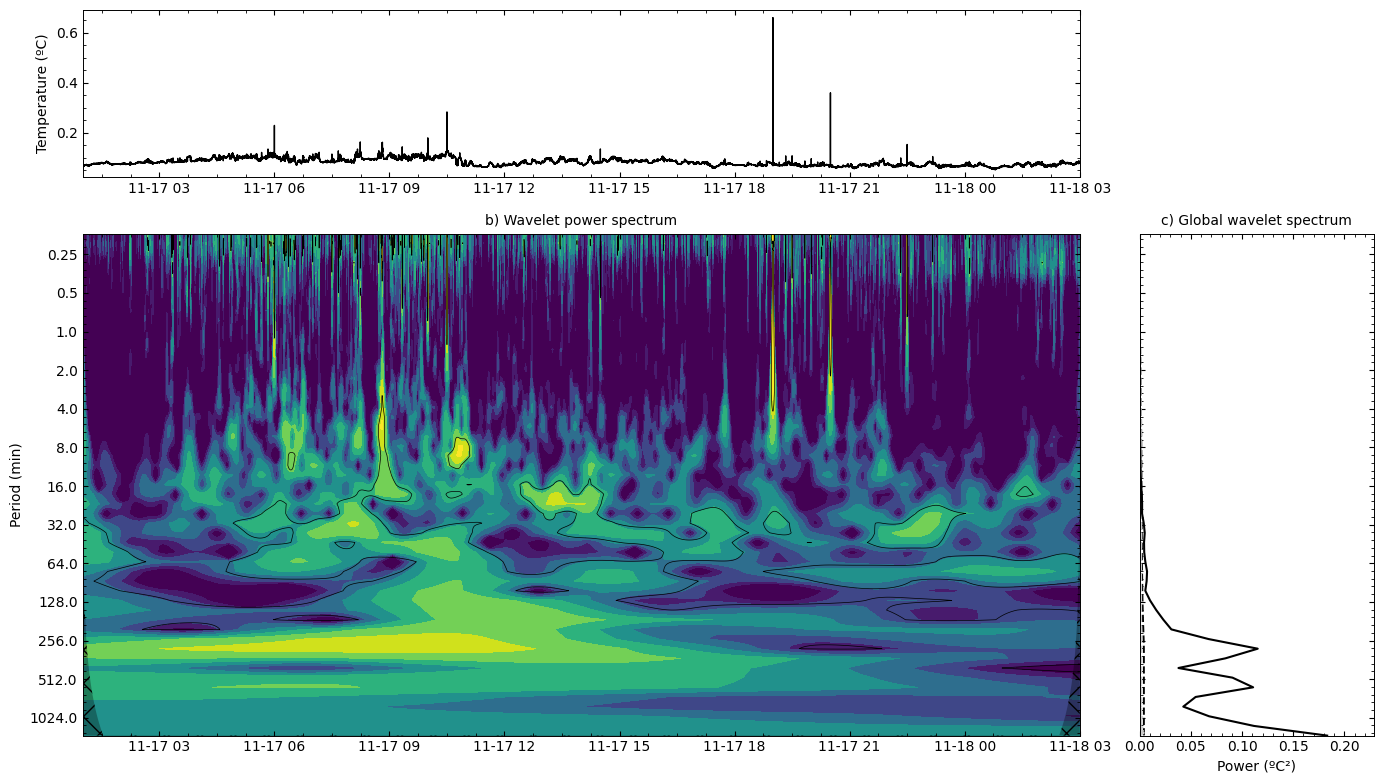

In [64]:
wavelet_power_spectrum(G05.x, data.date, period=period, norm_levels=2**6)